In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
ej_census_df = pd.read_csv("../data/merged_data/LA_merged_acs+epa_tracts_rename.csv")
ej_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GEO_ID                               2498 non-null   object 
 1   ID                                   2498 non-null   int64  
 2   NAME                                 2498 non-null   object 
 3   STATE_NAME                           2498 non-null   object 
 4   ST_ABBREV                            2498 non-null   object 
 5   CNTY_NAME                            2498 non-null   object 
 6   REGION                               2498 non-null   int64  
 7   Total_Pop                            2498 non-null   int64  
 8   Total_Pop_Error                      2498 non-null   int64  
 9   White_Only_Pop                       2498 non-null   int64  
 10  White_Only_Pop_Error                 2498 non-null   int64  
 11  White_Pop                     

In [39]:

ej_census_df.dropna(inplace=True)
ej_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2476 entries, 0 to 2493
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GEO_ID                               2476 non-null   object 
 1   ID                                   2476 non-null   int64  
 2   NAME                                 2476 non-null   object 
 3   STATE_NAME                           2476 non-null   object 
 4   ST_ABBREV                            2476 non-null   object 
 5   CNTY_NAME                            2476 non-null   object 
 6   REGION                               2476 non-null   int64  
 7   Total_Pop                            2476 non-null   int64  
 8   Total_Pop_Error                      2476 non-null   int64  
 9   White_Only_Pop                       2476 non-null   int64  
 10  White_Only_Pop_Error                 2476 non-null   int64  
 11  White_Pop                          

In [40]:
ej_census_df2 = ej_census_df[['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR', 'PRE1960PCT',
                              'White_Only_Pop', 'White_Pop',
                              'Black_or_African_American_Pop', 'Asian_Pop',
                              'Hispanic_or_Latino_Pop']]
ej_census_df2

,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PRE1960PCT,White_Only_Pop,White_Pop,Black_or_African_American_Pop,Asian_Pop,Hispanic_or_Latino_Pop
0,8.675543,80.34199,0.152921,30.0,0.3,412.030881,0.605857,2709,3174,73,442,1005
1,8.583354,80.78891,0.142590,30.0,0.3,406.773456,0.380785,2980,3272,144,752,339
2,8.751636,80.06156,0.220801,30.0,0.4,428.325634,0.517513,1978,2531,23,371,1783
3,8.758052,80.02020,0.212167,30.0,0.4,414.553538,0.253856,2545,2685,128,273,1203
4,8.758052,80.02020,0.212167,30.0,0.4,421.390067,0.319920,2404,2443,17,131,915
...,...,...,...,...,...,...,...,...,...,...,...,...
2488,9.929385,56.10672,1.068985,30.0,0.4,4331.473318,0.000000,0,0,0,0,0
2489,11.382785,66.88131,0.400257,30.0,0.4,2587.749895,1.000000,0,0,0,0,0
2490,11.330423,78.14896,0.374344,30.0,0.4,1824.707562,0.520958,206,219,0,62,514
2491,11.247097,74.23370,0.429218,30.0,0.4,1672.939642,0.000000,77,77,82,216,299


In [41]:
ej_census_df2.describe()

,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PRE1960PCT,White_Only_Pop,White_Pop,Black_or_African_American_Pop,Asian_Pop,Hispanic_or_Latino_Pop
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,10.088303,68.521220,0.368157,30.969305,0.407876,1671.489647,0.458600,1767.201939,2144.193457,375.863489,676.254847,1969.172052
std,1.204868,8.488621,0.122271,7.023012,0.086448,1934.105973,0.243620,1009.073585,1129.404266,552.660262,761.995092,1417.596091
min,6.079160,55.191900,0.040077,20.000000,0.200000,6.809216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.516190,61.511612,0.308323,30.000000,0.400000,648.518322,0.279000,1023.000000,1314.750000,71.000000,172.000000,769.750000
50%,10.418347,66.996815,0.389988,30.000000,0.400000,1050.538758,0.482261,1598.000000,1982.500000,195.000000,431.000000,1715.500000
75%,10.998667,75.156722,0.443731,30.000000,0.500000,2096.528806,0.652735,2341.000000,2787.500000,426.250000,870.750000,2936.250000
max,11.625568,89.679380,1.219097,200.000000,1.000000,33308.307154,1.000000,7279.000000,7864.000000,5683.000000,5938.000000,8126.000000


In [42]:
ej_census_df2['CANCER'].value_counts()

CANCER
30.0     1675
40.0      479
20.0      304
50.0       11
60.0        3
90.0        1
200.0       1
100.0       1
70.0        1
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='PM25'>

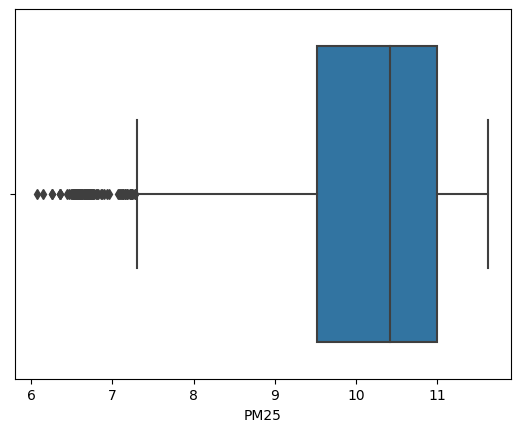

In [43]:
sns.boxplot(x=ej_census_df2['PM25'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='DSLPM'>

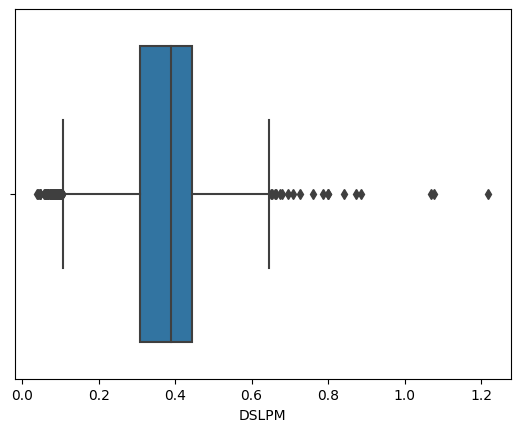

In [44]:
sns.boxplot(x=ej_census_df2['DSLPM'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='RSEI_AIR'>

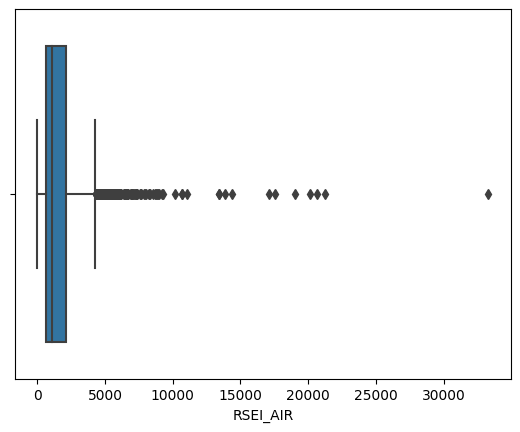

In [45]:
sns.boxplot(x=ej_census_df2['RSEI_AIR'])

In [46]:
ej_census_df.loc[ej_census_df['White_Pop'] == 7864]

,GEO_ID,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,Total_Pop,Total_Pop_Error,White_Only_Pop,...,RESP,RSEI_AIR,PTRAF,PRE1960,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
2278,1400000US06037702900,6037702900,"Census Tract 7029, Los Angeles County, California",California,CA,Los Angeles,9,9355,1446,7279,...,0.4,1065.992209,101.689103,199.0,0.031552,0.04913,0.141194,3.054381,4.114496,0.001493


In [47]:
ej_census_df2.loc[ej_census_df2['White_Pop'] == 7864]

,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PRE1960PCT,White_Only_Pop,White_Pop,Black_or_African_American_Pop,Asian_Pop,Hispanic_or_Latino_Pop
2278,9.781741,58.96178,0.345927,20.0,0.4,1065.992209,0.031552,7279,7864,694,1077,726


min	6.079160	55.191900	0.040077	20.000000	0.200000	6.809216	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000

25%	9.516190	61.511612	0.308323	30.000000	0.400000	648.518322	0.279000	1023.000000	1314.750000	71.000000	172.000000	769.750000

50%	10.418347	66.996815	0.389988	30.000000	0.400000	1050.538758	0.482261	1598.000000	1982.500000	195.000000	431.000000	1715.500000

This shows that, geographic area with ID 6037702900 has lower values for all of the environmental factors except RSEI_AIR (which is around 50%) and maximum white population

In [48]:
ej_census_df2.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PRE1960PCT,White_Only_Pop,White_Pop,Black_or_African_American_Pop,Asian_Pop,Hispanic_or_Latino_Pop
PM25,1.000000,-0.282402,0.762969,0.464655,0.656800,0.221558,0.437868,-0.315502,-0.287918,0.027415,0.103779,0.250610
OZONE,-0.282402,1.000000,-0.514848,0.014008,-0.103887,-0.461323,-0.183100,0.089746,0.099035,-0.257118,0.182026,0.067654
DSLPM,0.762969,-0.514848,1.000000,0.384929,0.631860,0.229526,0.381896,-0.338956,-0.326557,0.049887,-0.001546,0.173535
CANCER,0.464655,0.014008,0.384929,1.000000,0.602339,-0.091501,0.283074,-0.264342,-0.250629,-0.064641,-0.003670,0.169713
RESP,0.656800,-0.103887,0.631860,0.602339,1.000000,-0.134839,0.378683,-0.334572,-0.325078,0.005876,0.031949,0.100058
RSEI_AIR,0.221558,-0.461323,0.229526,-0.091501,-0.134839,1.000000,0.108572,-0.107794,-0.074659,0.286231,-0.076514,0.200565
PRE1960PCT,0.437868,-0.183100,0.381896,0.283074,0.378683,0.108572,1.000000,-0.093000,-0.074454,0.011955,-0.215434,0.222985
White_Only_Pop,-0.315502,0.089746,-0.338956,-0.264342,-0.334572,-0.107794,-0.093000,1.000000,0.973123,-0.129114,-0.012165,0.029946
White_Pop,-0.287918,0.099035,-0.326557,-0.250629,-0.325078,-0.074659,-0.074454,0.973123,1.000000,-0.091769,-0.015119,0.142832
Black_or_African_American_Pop,0.027415,-0.257118,0.049887,-0.064641,0.005876,0.286231,0.011955,-0.129114,-0.091769,1.000000,-0.130685,0.058540


<Axes: >

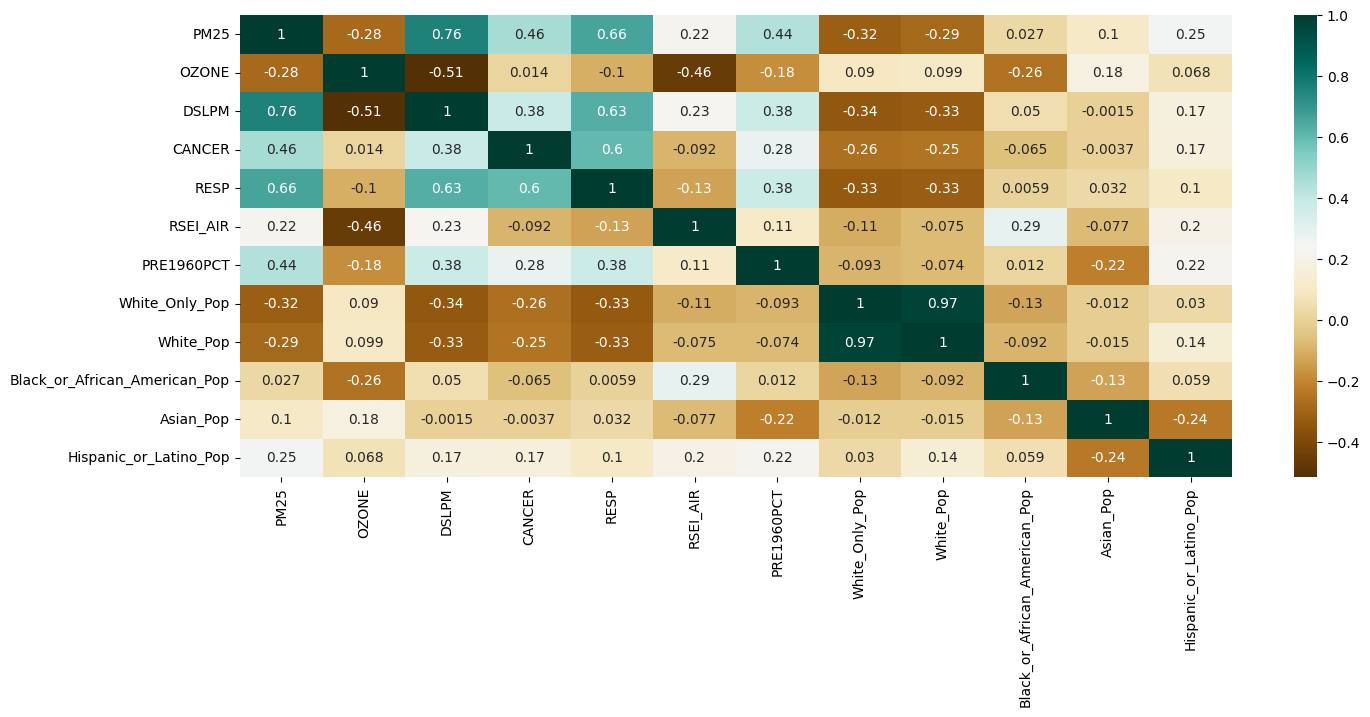

In [49]:
plt.figure(figsize=(16, 6))
sns.heatmap(ej_census_df2.corr(), annot=True, cmap='BrBG')

Does this imply that for LA county, DSLPM, CANCER and RESP decreases as white population increases or vice versa? which are dependent, independent variables?